In [1]:
# train.py
import pandas as pd
import re
import nltk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc
)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load and merge datasets
df_fake = pd.read_csv('Fake.csv')
df_real = pd.read_csv('True.csv')
df_fake['label'] = 0
df_real['label'] = 1
df = pd.concat([df_fake, df_real])
df['text'] = df['title'] + " " + df['text']


In [4]:
# Clean text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = [w for w in text.split() if w not in stop_words]
    return ' '.join(words)

df['text'] = df['text'].apply(clean_text)


In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)


In [6]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [7]:
# Model
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train_vec, y_train)


PassiveAggressiveClassifier()

In [8]:
# Predictions
y_pred = model.predict(X_test_vec)
y_pred_prob = model.decision_function(X_test_vec)


In [9]:
# Accuracy & Report
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9949

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4733
           1       1.00      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



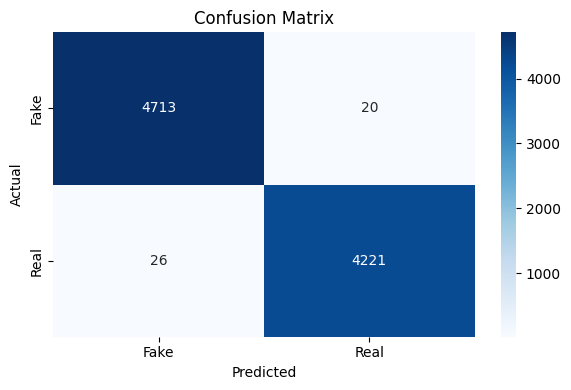

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

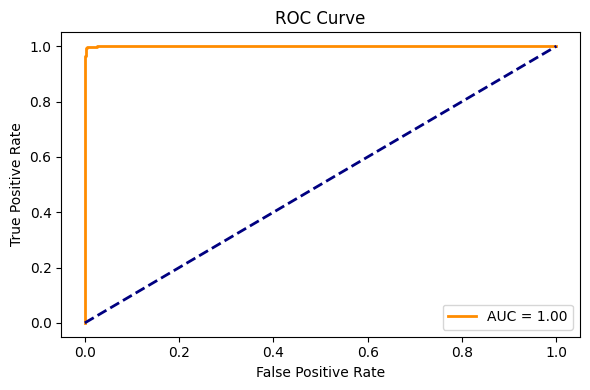

In [13]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.show()


In [14]:
# Save model & vectorizer
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
    

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Precision: 0.9952841311011554
Recall: 0.9938780315516835
F1 Score: 0.9945805843543827
